In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from Pachaches.functions import clean_PM25frame_coloumns
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
chem=pd.read_excel(r"chemical_updated.xlsx")

In [3]:
chem=chem.loc[chem.sample_time>3,:]

In [4]:
correction_formaldehyd=chem.drop(['Nox','no2', 'acetald', 'acetone','cpnr', 'visit', 'batch_c', 'start_c', 'stop_c', 'batch_n', 'start_n',
       'stop_n'],axis=1).loc[chem.formaldehyd.isna()==0]
correction_acetald=chem.drop(['Nox','no2', 'formaldehyd', 'acetone','cpnr', 'visit', 'batch_c', 'start_c', 'stop_c', 'batch_n', 'start_n',
       'stop_n'],axis=1).loc[chem.acetald.isna()==0]
correction_acetone=chem.drop(['Nox','no2', 'formaldehyd', 'acetald','cpnr', 'visit', 'batch_c', 'start_c', 'stop_c', 'batch_n', 'start_n',
       'stop_n'],axis=1).loc[chem.acetone.isna()==0]


In [5]:
def exp(x, a, b):
    return a * np.exp(b * x)
def linear(x, a, b):
    return a * x +b
def log(x, a, b):
    return a*b**x +b

In [6]:
X_train_formaldehyd, X_test_formaldehyd, y_train_formaldehyd, y_test_formaldehyd = train_test_split(correction_formaldehyd, correction_formaldehyd.formaldehyd, test_size = 0.3)
X_train_acetald, X_test_acetald, y_train_acetald, y_test_acetald = train_test_split(correction_acetald, correction_acetald.acetald, test_size = 0.3)
X_train_acetone, X_test_acetone, y_train_acetone, y_test_acetone = train_test_split(correction_acetone, correction_acetone.acetone, test_size = 0.3)


In [7]:
exp_curve_formaldehyd=curve_fit(lambda t,a,b: a*np.exp(b*t),  X_train_formaldehyd.sample_time,y_train_formaldehyd)
linear_curve_formaldehyd=curve_fit(lambda t,a,b: a * t +b,  X_train_formaldehyd.sample_time,y_train_formaldehyd)

In [10]:
exp_curve=curve_fit(lambda t,a,b: a*np.exp(b*t),  X_train_acetald.sample_time,y_train_acetald)
linear_curve=curve_fit(lambda t,a,b: a * t +b,  X_train_acetald.sample_time,y_train_acetald)

In [12]:
exp_curve=curve_fit(lambda t,a,b: a*np.exp(b*t),  X_train.sample_time,y_train)
linear_curve=curve_fit(lambda t,a,b: a * t +b,  X_train.sample_time,y_train)

NameError: name 'X_train' is not defined

In [14]:
rmse_exp_formaldehyd=np.sqrt(np.mean((exp(X_test_formaldehyd.sample_time,*exp_curve_formaldehyd[0])-y_test_formaldehyd)**2))
rmse_linear_formaldehyd=np.sqrt(np.mean((linear(X_test_formaldehyd.sample_time,*linear_curve_formaldehyd[0])-y_test_formaldehyd)**2))
print("Exponential RMSE: ",rmse_exp_formaldehyd,"Linear RMSE: ",rmse_linear_formaldehyd)
r2_exp=r2_score(y_test_formaldehyd,exp(X_test_formaldehyd.sample_time,*exp_curve_formaldehyd[0]))
r2_linear=r2_score(y_test_formaldehyd,linear(X_test_formaldehyd.sample_time,*linear_curve_formaldehyd[0]))
r2_exp,r2_linear

Exponential RMSE:  10.628728903591494 Linear RMSE:  10.622567952758255


(0.018967632733533968, 0.020104615434669015)

In [16]:
chem["formaldehyd_corrected_exp"]=exp(10,*exp_curve_formaldehyd[0])/exp(chem.sample_time,*exp_curve[0])*chem.no2
chem["formaldehyd_corrected_linear"]=linear(10,*linear_curve[0])/linear(chem.sample_time,*linear_curve[0])*chem.no2

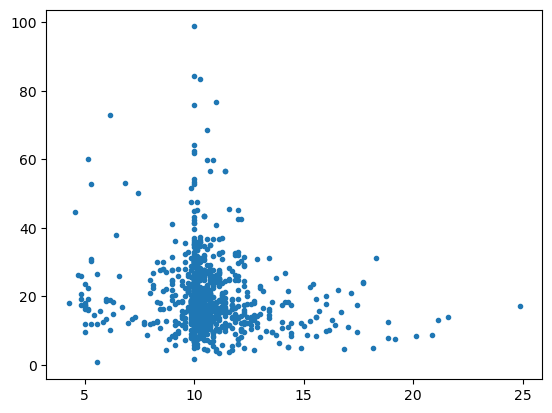

In [18]:
x=
plt.plot(chem.sample_time,chem.formaldehyd,'.')
plt.plot(chem.sample_time,chem.formaldehyd,'.')

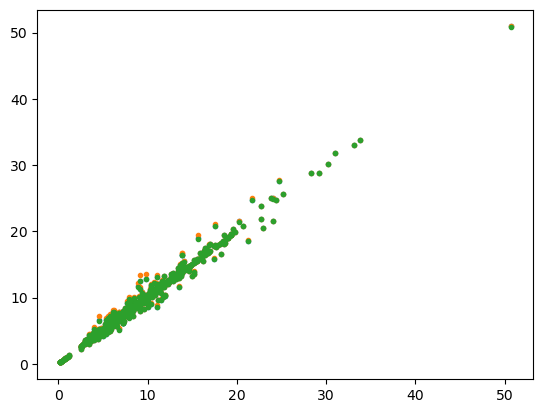

In [142]:
plt.plot(chem.no2,chem.no2_corrected_exp,'.')
plt.plot(chem.no2,chem.no2_corrected_linear,'.')
plt.plot(chem.no2,chem.no2_corrected_log,'.')

In [66]:
chem.sample_time

0        9.000000
1        9.428571
2       11.714286
3       15.428571
4       11.000000
          ...    
1006    10.714286
1007    12.285714
1008    11.285714
1009    10.000000
1010     9.285714
Name: sample_time, Length: 1011, dtype: float64